In [51]:
import lib.eda as eda
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

### Récupération des données des propriétées

Nous avions deux tables ou se trouvent données extraites dépuis des pages web.
**Propriétés** 

In [52]:
from lib.db import read_mongodb_to_dataframe

## Recuperations de toutes les données à partir de la bd
properties_db = read_mongodb_to_dataframe('real_estate_db', 'properties', no_id=False)
properties_details_db = read_mongodb_to_dataframe('real_estate_db', 'properties_details', no_id=False)

In [53]:
properties_db.head(5)

,_id,,add_date,address,city,company,description,img_src,link,plex-revenue,...,nbr_chanbres,nbr_sal_bain,nbr_sal_deau,parking,prix_evaluation,revenus_annuels_bruts,style,superficie,taxes,geolocation
0,13363515,2152.0,2022-03-06 00:00:00,"{'street': '6926 - 6928, Avenue Somerled', 'l...",Montréal (Côte-des-Neiges/Notre-Dame-de-Grâce),Centris,Duplex à vendre à Montréal (Côte-des-Neiges/No...,https://mspublic.centris.ca/media.ashx?id=ADDD...,https://www.centris.ca/fr/duplex~a-vendre~mont...,Rev. bruts pot. : 26 100 $,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25761492,NaN,2024-07-12 00:00:00,"{'street': '1657, Rue Riendeau', 'locality': '...",Chambly,Centris,"Maison à vendre à Chambly, Montérégie, 1657, R...",https://mspublic.centris.ca/media.ashx?id=ADDD...,https://www.centris.ca/fr/maison~a-vendre~cham...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20417145,NaN,2024-08-22 00:00:00,"{'street': '1384, Rue de Niverville', 'localit...",Chambly,Centris,"Condo à vendre à Chambly, Montérégie, 1384, Ru...",https://mspublic.centris.ca/media.ashx?id=ADDD...,https://www.centris.ca/fr/condo~a-vendre~chamb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23726086,NaN,2024-08-15 00:00:00,"{'street': '952, Rue Chaumont', 'locality': 'C...",Chambly,Centris,"Maison à vendre à Chambly, Montérégie, 952, Ru...",https://mspublic.centris.ca/media.ashx?id=ADDD...,https://www.centris.ca/fr/maison~a-vendre~cham...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18532646,NaN,2024-07-07 00:00:00,"{'street': '1646, Rue Napoléon-Bisson', 'local...",Chambly,Centris,"Maison à vendre à Chambly, Montérégie, 1646, R...",https://mspublic.centris.ca/media.ashx?id=ADDD...,https://www.centris.ca/fr/maison~a-vendre~cham...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
properties_details_db.head(5)

,_id,description,images,geo,annee,superficie,parking,revenus_annuels_bruts,taxes,unites,...,nbr_chanbres,nbr_sal_bain,nbr_sal_deau,prix_evaluation,style,address,link,nbr_bathroom,nbr_bedroom,vendue
0,19205127,C'est ici que vos recherches s'arrêtent!!! Vot...,[https://mspublic.centris.ca/media.ashx?id=ADD...,"{'latitude': '46.9833982700', 'longitude': '-7...",2014,29 620 pc,Allée (2),24 600 $,"{'municipales': '3590', 'scolaires': '267'}",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16846441,"Duplex, vous êtes un investisseur ou vous voul...",[https://mspublic.centris.ca/media.ashx?id=ADD...,"{'latitude': '46.8426920000', 'longitude': '-7...",1968,9 647 pc,Allée (5),21 300 $,"{'municipales': '3 158', 'scolaires': '243'}","[{'unite': '4 ½', 'nb_unite': '1 '}, {'unite':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18535427,Pour investisseur. Duplex dont un logement 4 1...,[https://mspublic.centris.ca/media.ashx?id=ADD...,"{'latitude': '46.2267203100', 'longitude': '-7...",1958,3 455 pc,Allée (5),11 760 $,"{'municipales': '1 641', 'scolaires': '68'}",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24303612,Superbe Quadruplex bien situé. Idéal pour inve...,[https://mspublic.centris.ca/media.ashx?id=ADD...,"{'latitude': '45.2048700000', 'longitude': '-7...",1935,4 715 pc,NaN,23 880 $,"{'municipales': '3 981', 'scolaires': '183'}","[{'unite': '3 ½', 'nb_unite': '2 '}, {'unite':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19680893,Maison à vendre à Charlesbourg. Charmante prop...,[https://mspublic.centris.ca/media.ashx?id=ADD...,"{'latitude': '46.8790530000', 'longitude': '-7...",1974,NaN,"Abri d'auto (1), Allée (6)",34 560 $,"{'municipales': '2804 ', 'scolaires': '252 '}","[{'unite': '1 ½', 'nb_unite': '3 '}, {'unite':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statistiques descriptives


In [55]:
properties_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    99826 non-null  int64  
 1                          1 non-null      float64
 2   add_date               99826 non-null  object 
 3   address                99826 non-null  object 
 4   city                   99826 non-null  object 
 5   company                99826 non-null  object 
 6   description            99826 non-null  object 
 7   img_src                84593 non-null  object 
 8   link                   99826 non-null  object 
 9   plex-revenue           16151 non-null  object 
 10  price                  99826 non-null  float64
 11  type                   84958 non-null  object 
 12  update_at              99826 non-null  object 
 13  vendue                 99381 non-null  object 
 14  revenu                 17293 non-null  float64
 15  su

In [56]:
properties_details_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107154 entries, 0 to 107153
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   _id                    107154 non-null  object 
 1   description            102218 non-null  object 
 2   images                 107154 non-null  object 
 3   geo                    107154 non-null  object 
 4   annee                  82615 non-null   object 
 5   superficie             76391 non-null   object 
 6   parking                58104 non-null   object 
 7   revenus_annuels_bruts  16014 non-null   object 
 8   taxes                  94820 non-null   object 
 9   unites                 81643 non-null   object 
 10  created_at             25582 non-null   object 
 11  depenses               21161 non-null   object 
 12  nbr_chanbres           48664 non-null   float64
 13  nbr_sal_bain           46860 non-null   float64
 14  nbr_sal_deau           14998 non-nul

### Selection des variables

In [57]:
cols_selected = ['_id', 'add_date', 'city', 'description', 'longitude', 'latitude','price', 'type', 'municipal_taxes', 'school_taxes','construction_year','surface','region', 'vendue']

In [58]:
df_properties = properties_db[cols_selected].copy()

In [59]:
df_properties.head(10)

,_id,add_date,city,description,longitude,latitude,price,type,municipal_taxes,school_taxes,construction_year,surface,region,vendue
0,13363515,2022-03-06 00:00:00,Montréal (Côte-des-Neiges/Notre-Dame-de-Grâce),Duplex à vendre à Montréal (Côte-des-Neiges/No...,NaN,NaN,749000.0,Duplex,NaN,NaN,NaN,NaN,NaN,True
1,25761492,2024-07-12 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 1657, R...",-73.292301,45.430607,574900.0,Maison,2930.0,339.0,1991.0,NaN,NaN,True
2,20417145,2024-08-22 00:00:00,Chambly,"Condo à vendre à Chambly, Montérégie, 1384, Ru...",-73.297033,45.432642,448800.0,Condo,2285.0,274.0,2013.0,1266.0,NaN,True
3,23726086,2024-08-15 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 952, Ru...",-73.287130,45.442001,519900.0,Maison,NaN,NaN,1963.0,NaN,NaN,True
4,18532646,2024-07-07 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 1646, R...",-73.322884,45.434597,848500.0,Maison,5013.0,634.0,2019.0,3922.0,NaN,True
5,16700867,2024-08-22 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 5, Rue ...",-73.292063,45.457826,925000.0,Maison,NaN,NaN,1981.0,19059.0,NaN,True
6,21678408,2024-08-19 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 1285, A...",-73.306337,45.446623,659000.0,Maison,2647.0,308.0,2013.0,NaN,NaN,True
7,13544392,2024-07-12 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 1372, R...",-73.290873,45.438721,599000.0,Maison,NaN,NaN,1964.0,6027.0,NaN,True
8,9862041,2024-07-24 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 1791, A...",-73.281452,45.448023,839800.0,Maison,NaN,NaN,1956.0,NaN,NaN,True
9,11692802,2024-07-27 00:00:00,Chambly,"Maison à vendre à Chambly, Montérégie, 45, Rue...",-73.269396,45.443781,774900.0,Maison,4009.0,373.0,1974.0,NaN,NaN,True


### Retypage des variables

In [60]:
df_properties.dtypes

_id                    int64
add_date              object
city                  object
description           object
longitude            float64
latitude             float64
price                float64
type                  object
municipal_taxes      float64
school_taxes         float64
construction_year    float64
surface              float64
region                object
vendue                object
dtype: object

In [61]:
df_properties['add_date'] = pd.to_datetime(df_properties['add_date'],errors='coerce')

In [62]:
df_properties.dtypes

_id                           int64
add_date             datetime64[ns]
city                         object
description                  object
longitude                   float64
latitude                    float64
price                       float64
type                         object
municipal_taxes             float64
school_taxes                float64
construction_year           float64
surface                     float64
region                       object
vendue                       object
dtype: object

### Élimination des doublons

In [63]:
df_properties['_id'].duplicated().sum()

0

### Visualisation des valeurs manquantes

<Axes: >

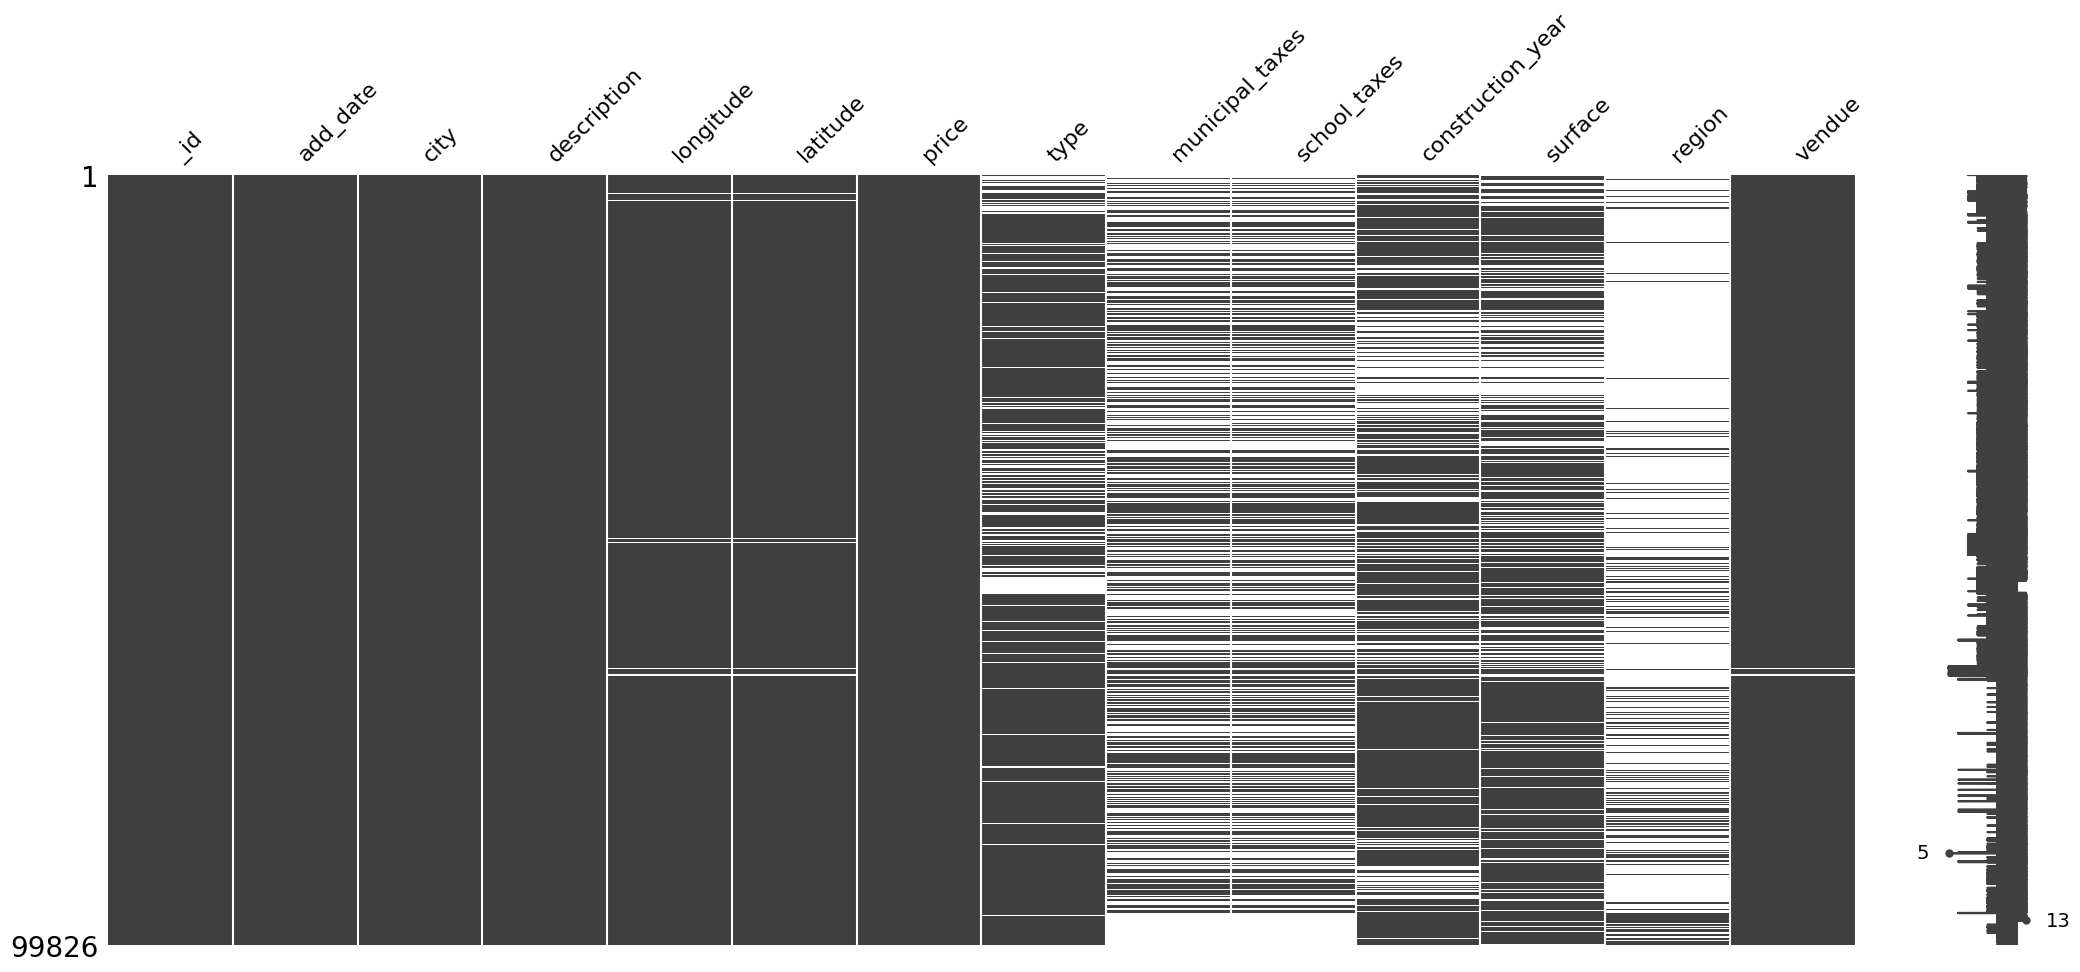

In [64]:
msno.matrix(df_properties)

<Axes: >

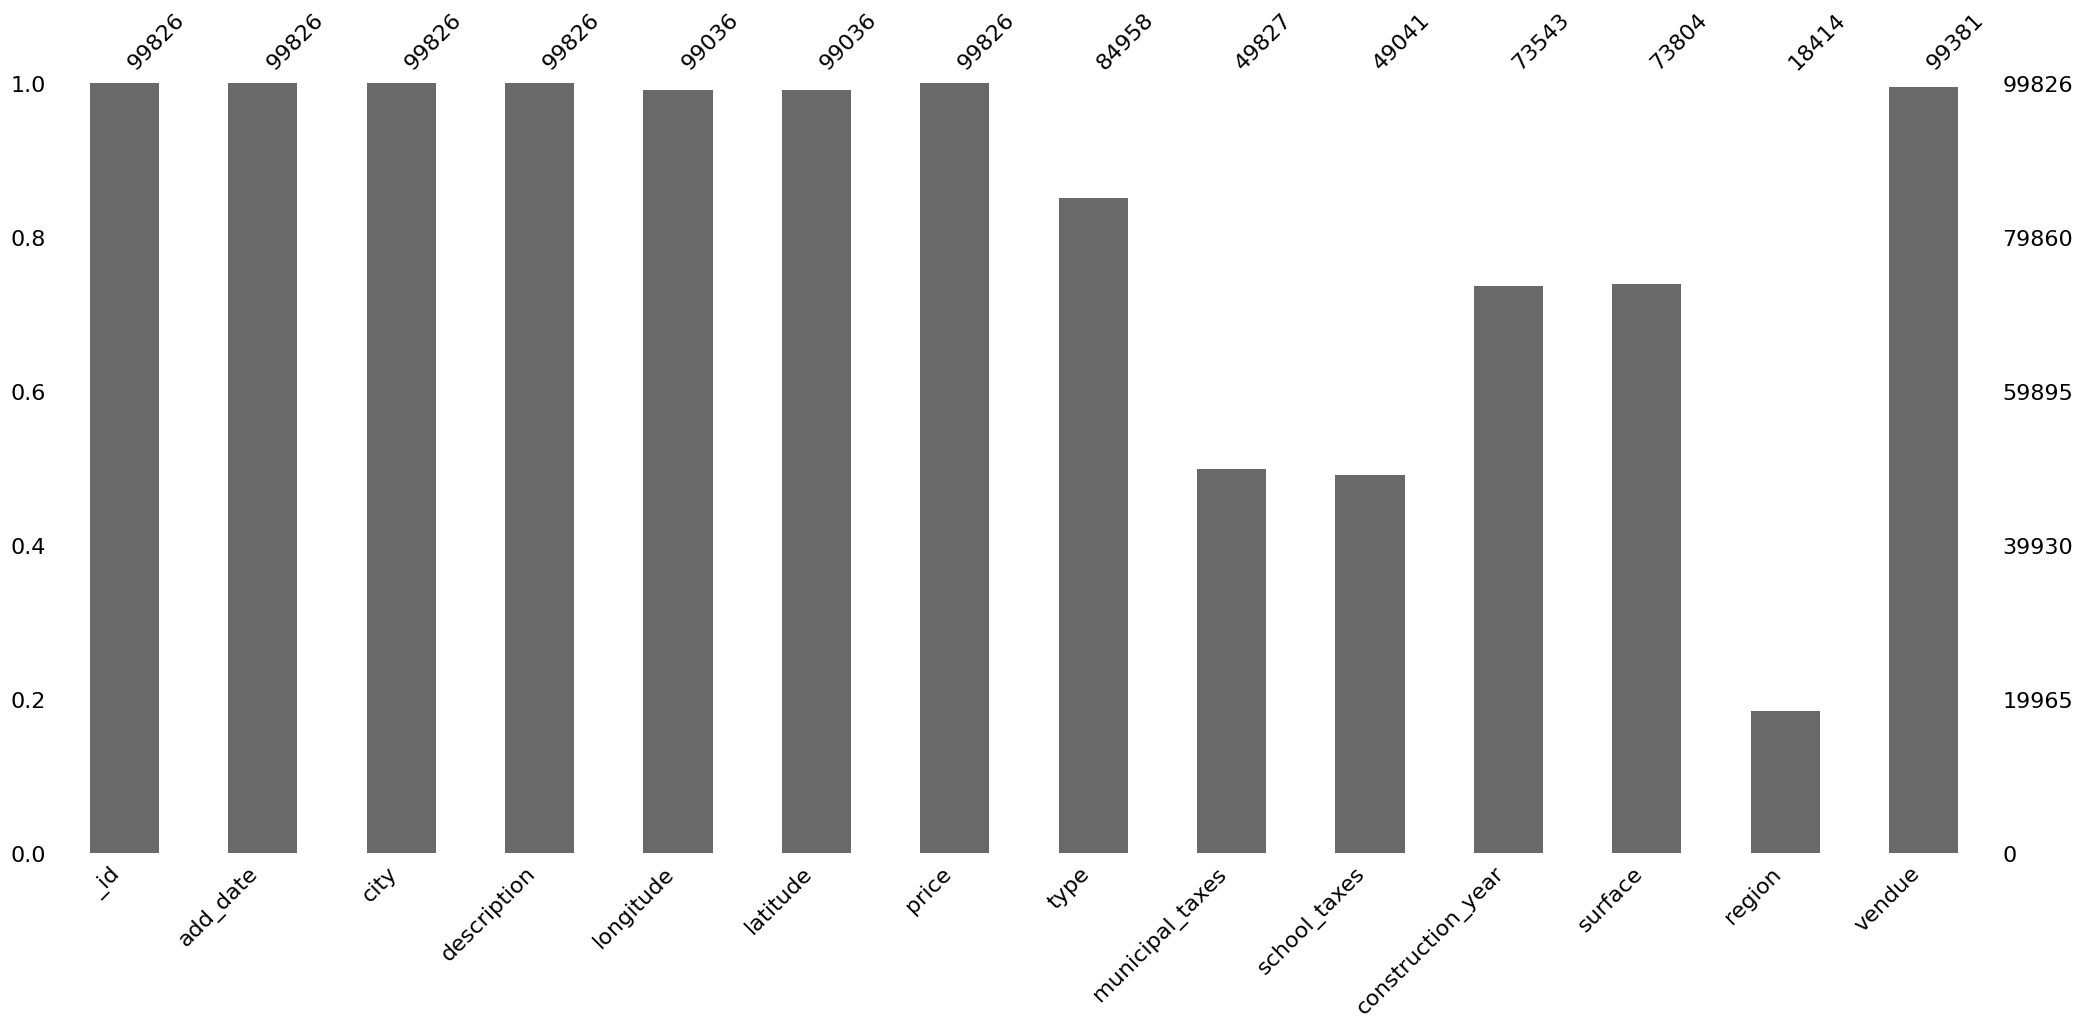

In [65]:
msno.bar(df_properties)

### Matrice de correalacion

<Axes: >

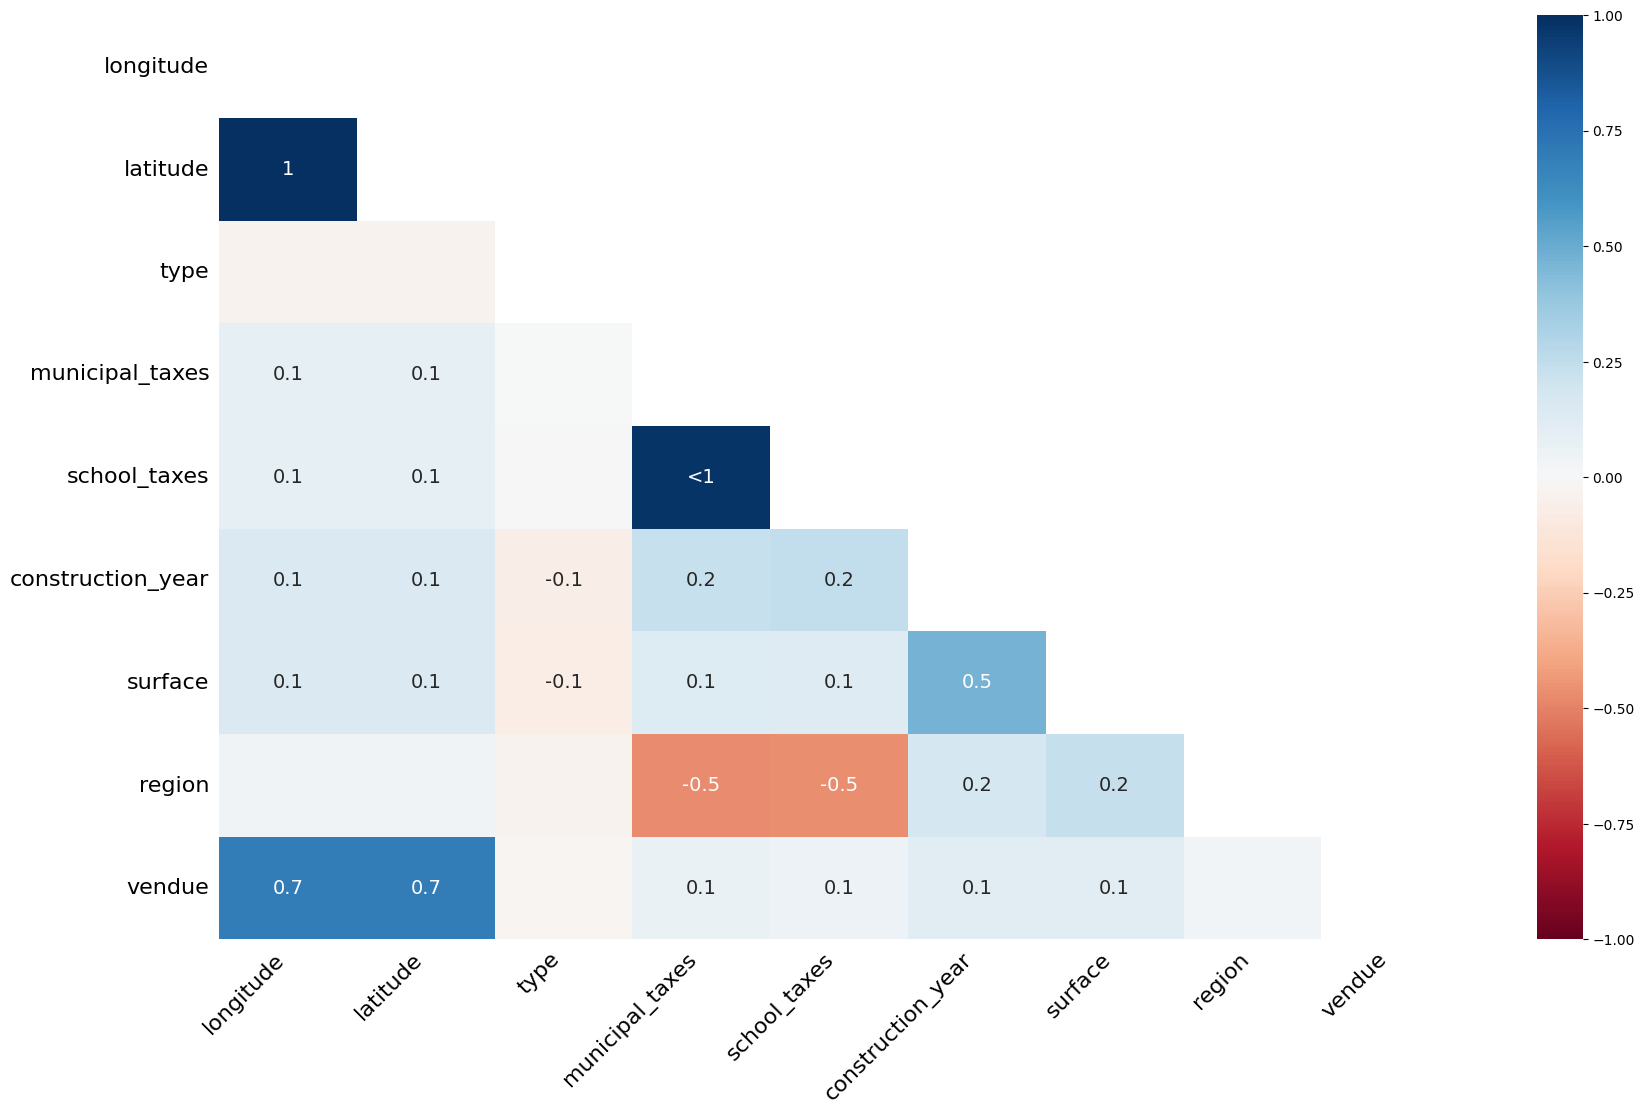

In [66]:
msno.heatmap(df_properties)

### Corrélation entre les valeurs manquantes

<Axes: >

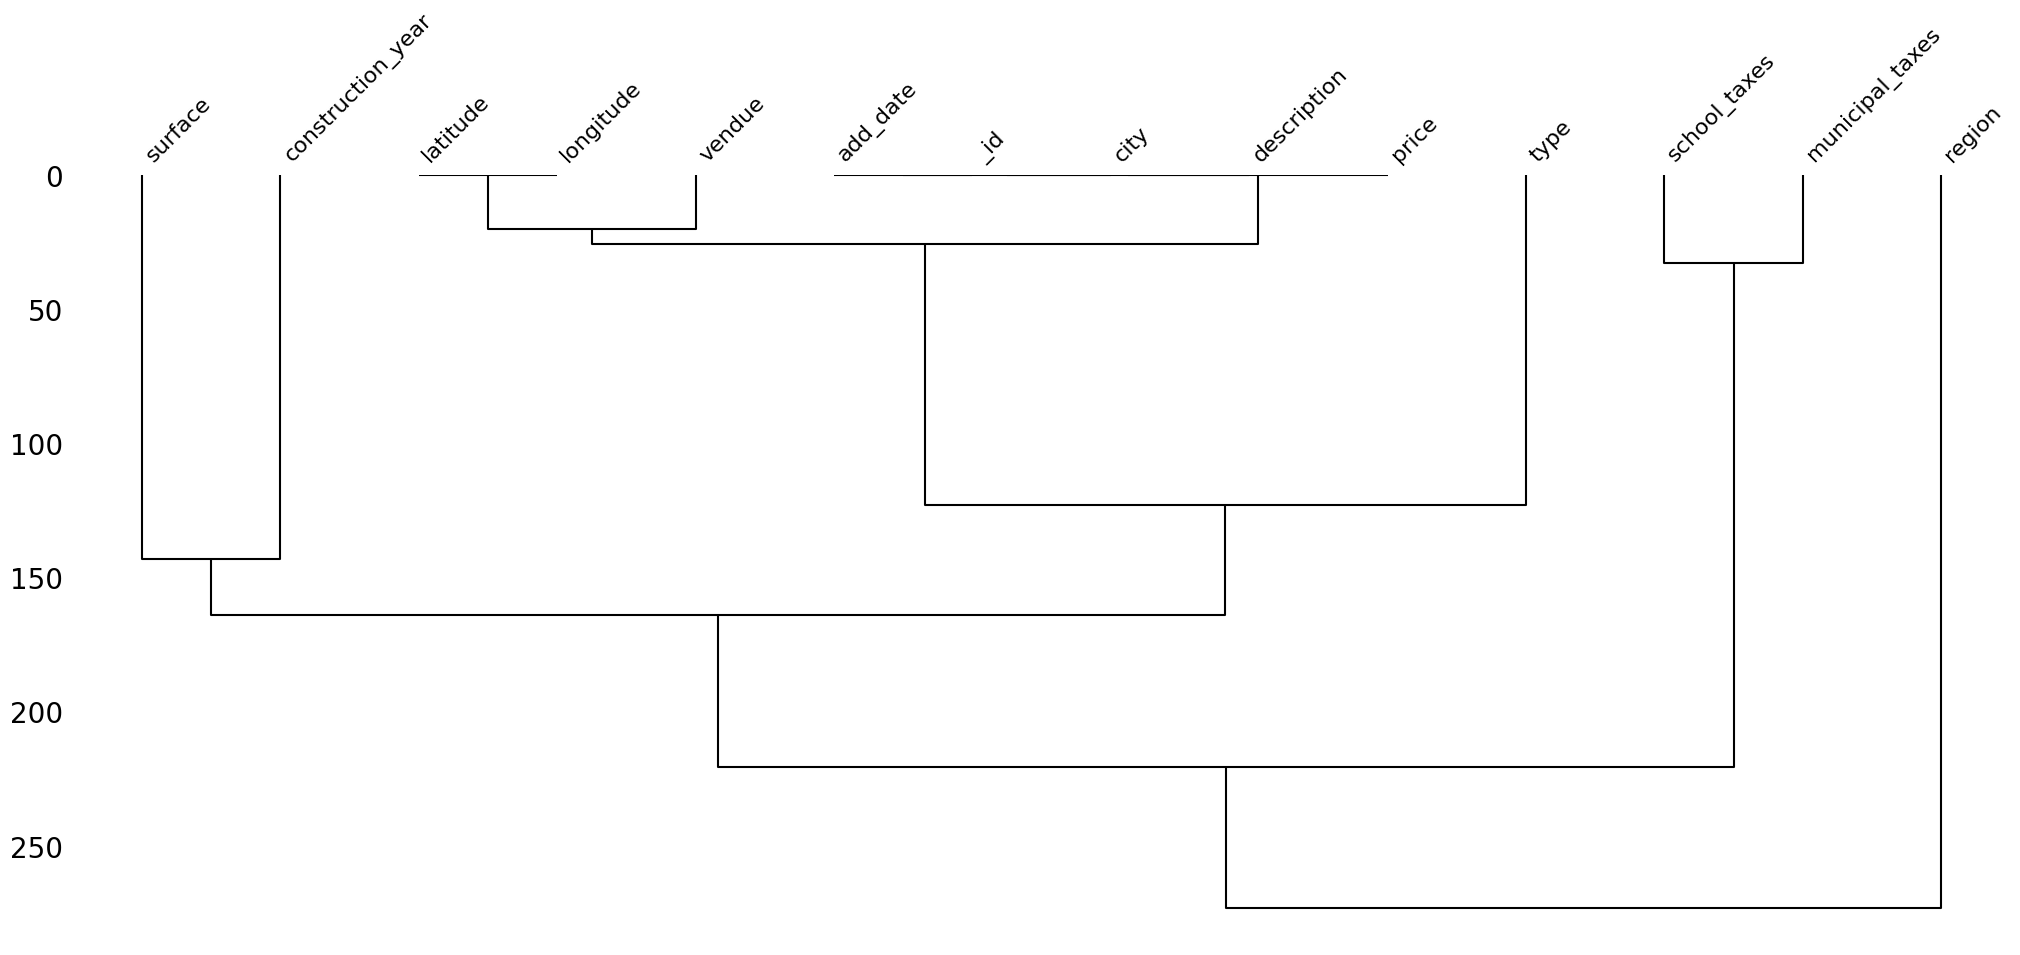

In [67]:
msno.dendrogram(df_properties)

### Proportion des valeurs manquantes

In [68]:
df_missing_proportion = eda.missing_data_proportion(df_properties, in_percente=True)

Les colonnes avec des données manquantes en pourcentage:
               Column  Missing
0              region    81.55
1        school_taxes    50.87
2     municipal_taxes    50.09
3   construction_year    26.33
4             surface    26.07
5                type    14.89
6           longitude     0.79
7            latitude     0.79
8              vendue     0.45
9                 _id     0.00
10           add_date     0.00
11               city     0.00
12        description     0.00
13              price     0.00


### Nettoyage des données

Gérer les valeurs manquantes ou incohérentes :


In [69]:
# Remplacer les valeurs manquantes pour `type` et `region` par "Inconnu"
df_properties['type'].fillna("Inconnu", inplace=True)
df_properties['region'].fillna("Inconnu", inplace=True)

# Supprimer les lignes où longitude ou latitude sont nulles (si nécessaire pour une analyse géographique)
df_properties = df_properties.dropna(subset=['longitude', 'latitude'])

# Remplacer les taxes municipales ou scolaires manquantes par 0 (si logique dans ton contexte)
df_properties['municipal_taxes'].fillna(0, inplace=True)
df_properties['school_taxes'].fillna(0, inplace=True)

# Remplir les colonnes numériques avec des valeurs alternatives (par exemple : médiane)
df_properties['surface'].fillna(df_properties['surface'].median(), inplace=True)

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_4493/3701155305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_properties['type'].fillna("Inconnu", inplace=True)
/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_4493/3701155305.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

<Axes: >

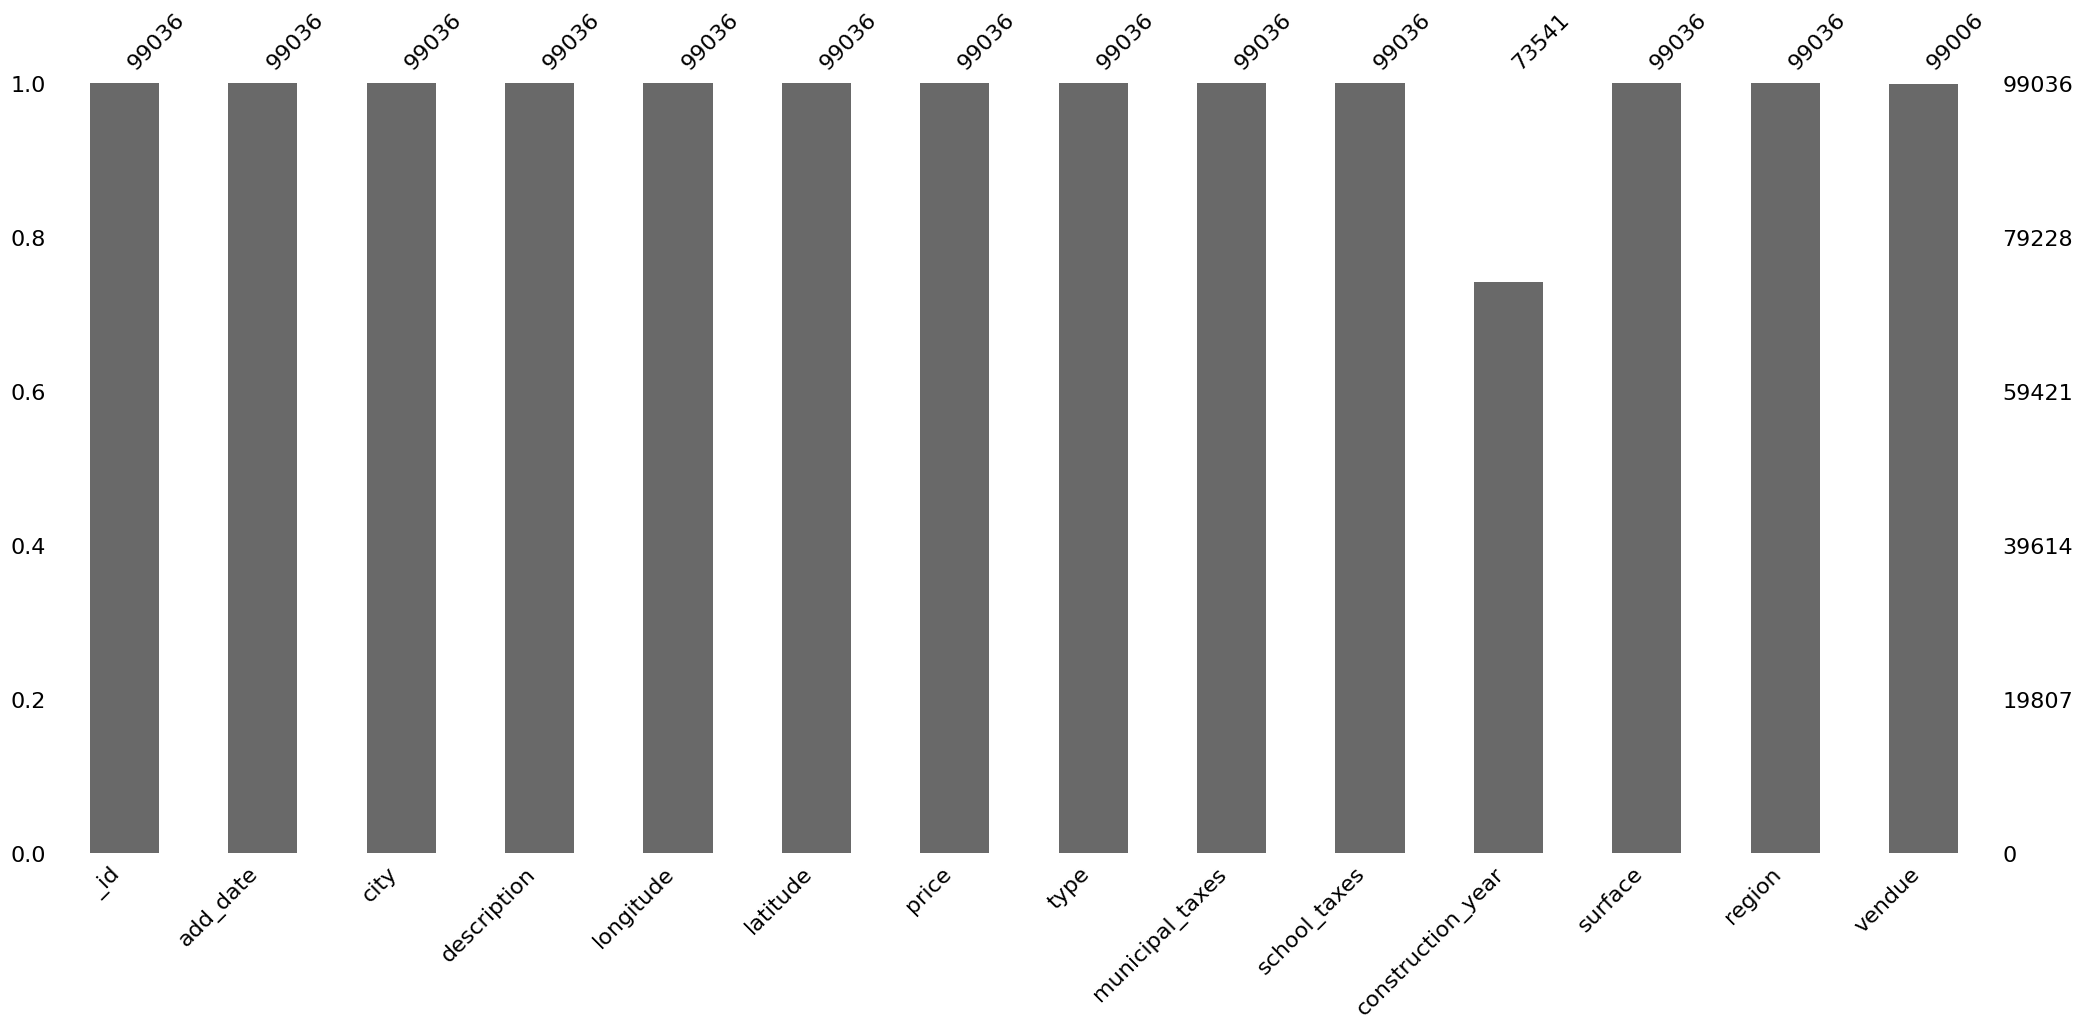

In [71]:
msno.bar(df_properties)

### Save data to csv

In [72]:
from datetime import datetime


df_properties.to_csv(f'./backup/properties_db_{datetime.now().strftime("%Y%m%d")}.csv', index=False)

### Liste des villes avec des propiétées en ventes

In [73]:
%%sql
select distinct city from properties_db where vendue = FALSE

UsageError: Cell magic `%%sql` not found.


#### Villes avec le plus grand nombre de propriétés

In [ ]:
%%sql
select * from (select city from properties
group by city 
order by count(city) desc limit 15)
--union select 'Chambly' as city


In [ ]:
%%sql
select * from (select city, count(city) from properties
group by city 
order by count(city) desc limit 15)
--union select 'Chambly' as city


#### Villes avec le plus grand nombre de propriétés par mois d'ajout

In [ ]:
%%sql
select * from (select city, count(city) nbr_properties, year_month_added from properties
group by city, year_month_added 
order by count(city) desc)
--union select 'Chambly' as city

In [ ]:
cities_most_est_by_add_date.to_csv('cities_most_est_by_add_date.csv')

In [ ]:
%%sql
select * from cities_most_est_by_add_date where city= 'Trois-Rivières'

In [ ]:
#df= cities_most_est_by_add_date #[df['type'].isin(['Maison','Plex','Condo'])]
df= _df
#df_start = df[df['city'].isin(cities.iloc[4])]
fig = px.bar(df, x="year_month_added", y="nbr_properties",
             labels={'year_month_added': 'Date', 'nbr_properties': 'Nombre de propriétés'},
             width=800, height=700, title=f"Trois-Rivières - Distribution du nombre de propriétés ajoutées par période")

'''cities_buttons = [{'label': x['city'], 'method': 'update',
     'args': 
     [{'x': [df[df['city']==x['city']]['year_month_added']], 
       'y': [df[df['city']==x['city']]['nbr_properties']]
       },{'title': f'{x['city']} - Distribution du nombre de propriétés par type'}]} for i,x in cities.iterrows()]'''

#print(cities_buttons)
#Add dropdown
''' fig.update_layout(
    updatemenus=[
        dict(
            buttons=cities_buttons,
            direction="down",
            pad={"r": 0, "t": 10},
            showactive=True,
            x=-0.1,
            xanchor="left",
            y=1.3,
            yanchor="top"
        ),
    ]
) '''
fig.show()

### Nombre de propriétés a vendre par ville et type de propriété

In [ ]:
%%sql
select city, type, count(type) as properties_count,min(price),avg(price),max(price), year_month_added
from properties
group by city,year_month_added,type
order by city,year_month_added


In [ ]:
%%sql
select sum(properties_count) as count, type,city from (select properties_count,
                                                      case 
                                                        when type like '%plex%' 
                                                            THEN 'Plex' 
                                                        else type
                                                        end as type,
                                                      city
                                                      from nbr_properties_by_city_typ) group by type,city

In [ ]:
#_df=df #[df['type'].isin(['Maison','Plex','Condo'])]
df_start = df[df['city'].isin(cities.iloc[0])]
fig = px.bar(df_start, x="type", y="count",
             labels={"type":"Type", "count":"Nombre de propriétés"},
             width=800, height=700, title=f"{cities.iloc[0]['city']} - Distribution du nombre de propriétés par type")

cities_buttons = [{'label': x['city'], 'method': 'update',
     'args': 
     [{'x': [df[df['city']==x['city']]['type']], 
       'y': [df[df['city']==x['city']]['count']]
       },{'title': f'{x['city']} - Distribution du nombre de propriétés par type'}]} for i,x in cities.iterrows()]

#print(cities_buttons)
#Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=cities_buttons,
            direction="down",
            pad={"r": 0, "t": 10},
            showactive=True,
            x=-0.1,
            xanchor="left",
            y=1.3,
            yanchor="top"
        ),
    ]
)
fig.show()

In [ ]:
%%sql
select * from nbr_properties_by_city_typ where city = 'Trois-Rivières' and type = 'Duplex'
                                and properties_count > 10
order by year_month_added asc

#### Variations du prix moyen par année - mois

In [ ]:
%%sql
select * from properties where city = 'Trois-Rivières' and type = 'Duplex'

In [ ]:
fig = px.scatter(df, x="year_month_added", y="price", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.line(df, x="year_month_added", y="avg(price)",
              #hover_data={"add_date": "|%B %d, %Y"},
              title='custom tick labels')
fig.show()


In [ ]:
%%sql
select * from properties_1 where city in (select 'Chambly')

In [ ]:

fig = px.bar(df,x='year_month_added')
fig.show()